<a href="https://colab.research.google.com/github/HMNS19/house-price-prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data=pd.read_csv('/content/House Price India.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [ ]:
data.isnull().sum()

,0
id,0
Date,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0


In [ ]:
data.sample(5)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
5223,6762822250,42568,2,1.75,1270,7560,1.5,0,0,4,...,1932,0,122038,52.9383,-114.547,1480,7560,3,61,416000
582,6762831055,42501,3,1.50,1370,8470,1.0,0,0,4,...,1961,0,122023,52.5174,-114.382,1710,8800,2,73,185000
13169,6762813324,42704,3,1.75,3520,12350,1.0,0,4,4,...,1960,0,122009,52.8137,-114.572,2140,7800,2,50,775000
3700,6762822386,42546,3,2.50,2490,4540,2.5,0,0,3,...,2012,0,122015,52.7351,-114.345,2640,3844,2,54,414000
6642,6762823400,42589,3,2.50,2198,6222,2.0,0,2,3,...,2010,0,122043,52.6206,-114.494,2198,7621,2,54,388000


In [ ]:
data['Price'].describe()

KeyError: 'Price'

<Axes: >

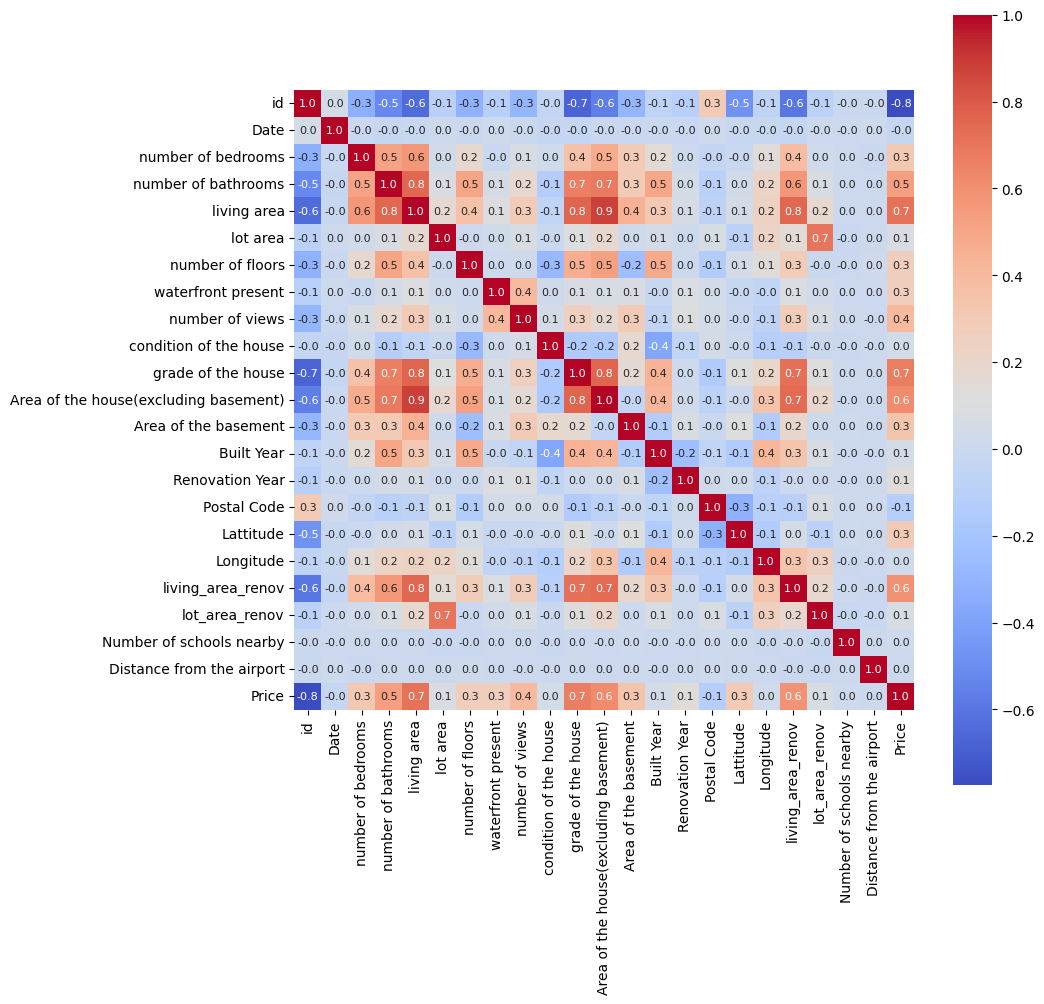

In [ ]:
correl=data.corr()
plt.figure(figsize=(10,10))

sns.heatmap(correl, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='coolwarm')

In [ ]:
print(data.columns)

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')


Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'number of views', 'condition of the house',
       'grade of the house', 'Area of the house(excluding basement)',
       'Area of the basement', 'Built Year', 'Price'],
      dtype='object')

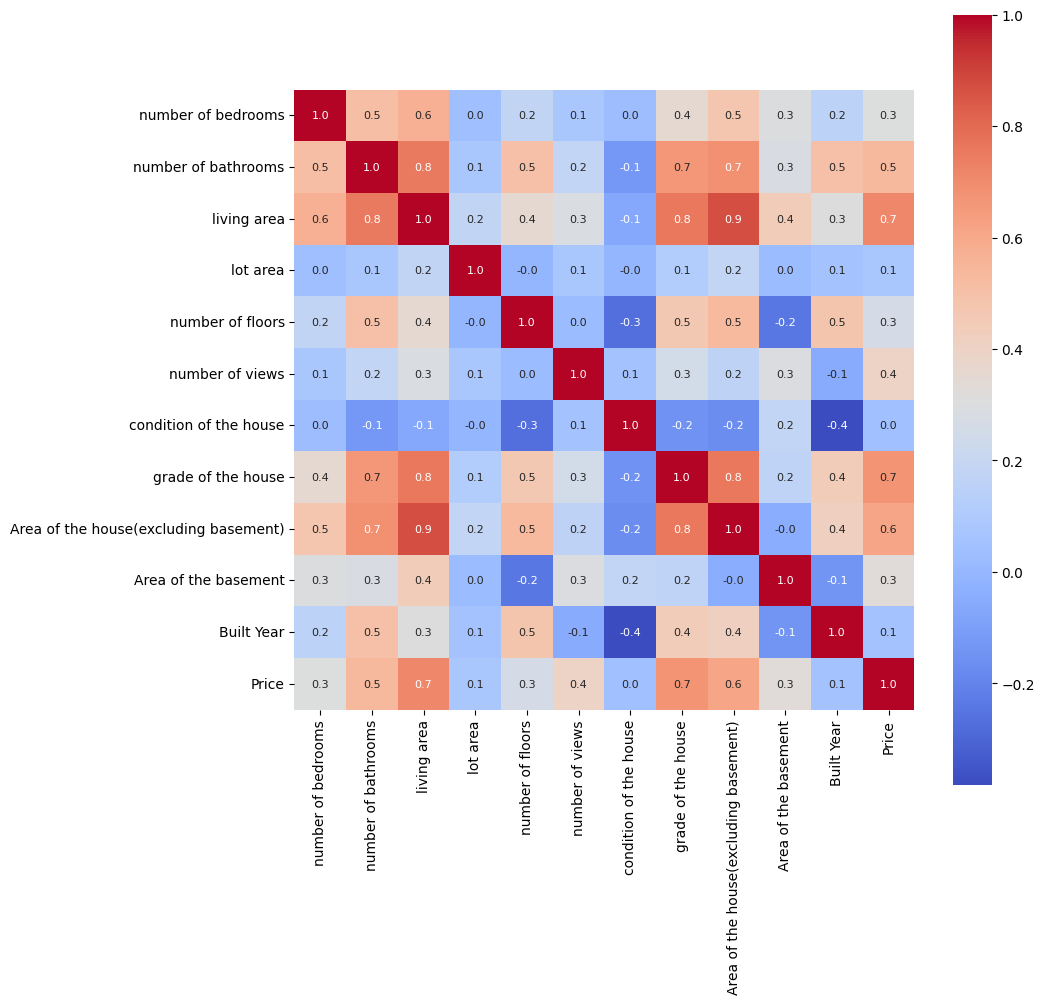

In [ ]:

columns_to_remove = ['id', 'Date', 'waterfront present', 'lot_area_renov',
                     'Renovation Year', 'Number of schools nearby','Postal Code', 'Lattitude',
       'Longitude', 'Distance from the airport', 'living_area_renov']
data1 = data.drop(columns=columns_to_remove,errors='ignore')
correl=data1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correl, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='coolwarm')
data1.columns

Index(['lot area', 'number of floors', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Built Year', 'Price',
       'Total_Area', 'Bathrooms_and_Rooms'],
      dtype='object')

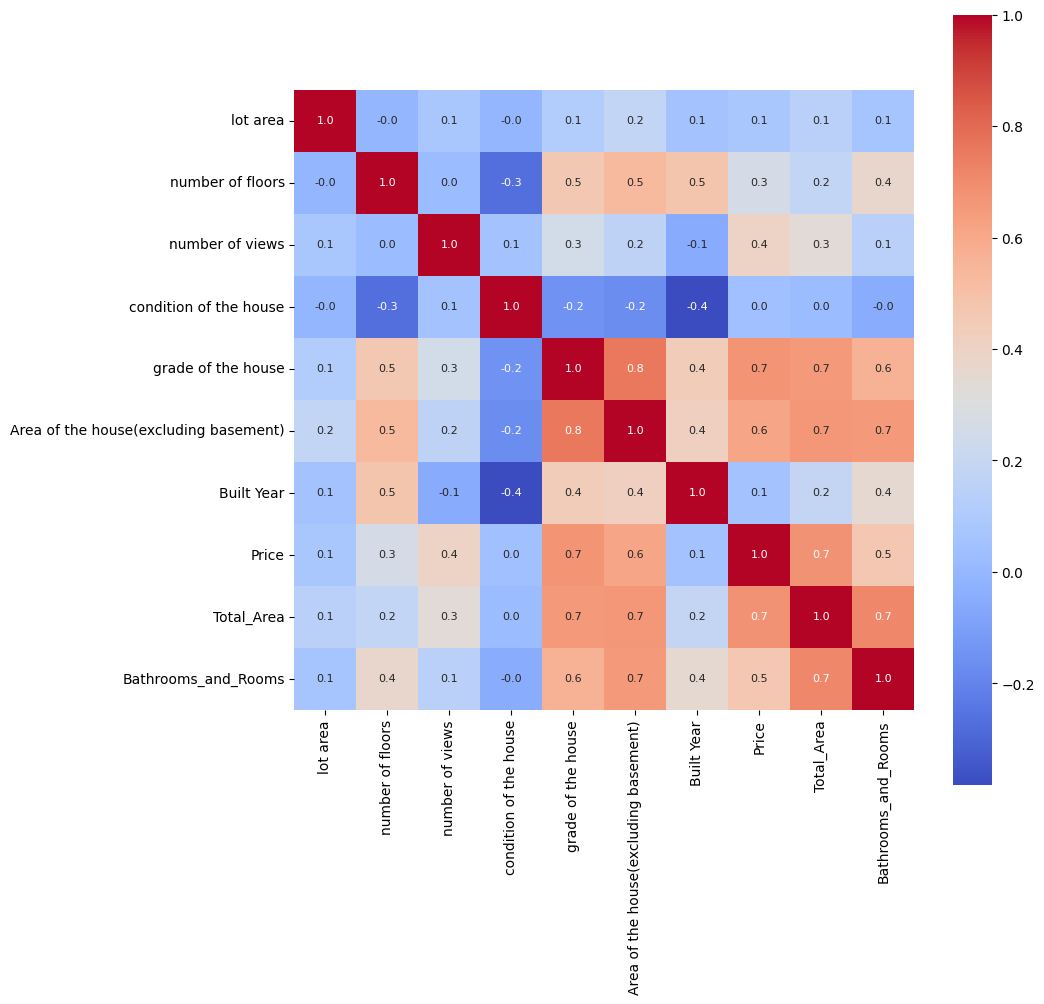

In [ ]:
data1['Total_Area']=data1['living area']+data1['Area of the basement']
data1['Bathrooms_and_Rooms']=data1['number of bedrooms']+data1['number of bathrooms']
data2=data1.drop(columns=['Area of the basement','number of bedrooms','number of bathrooms','living area'],errors='ignore')
correl=data2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correl, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='coolwarm')
data2.columns

In [ ]:
X=data2.drop(columns=['Price'],axis=1)
Y=data2['Price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=7)
print(X.shape,X_train.shape,X_test.shape)

(14620, 9) (11696, 9) (2924, 9)


In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 46526935766.75281


In [ ]:
Y.describe()

,Price
count,1.462000e+04
mean,5.389322e+05
std,3.675324e+05
min,7.800000e+04
25%,3.200000e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


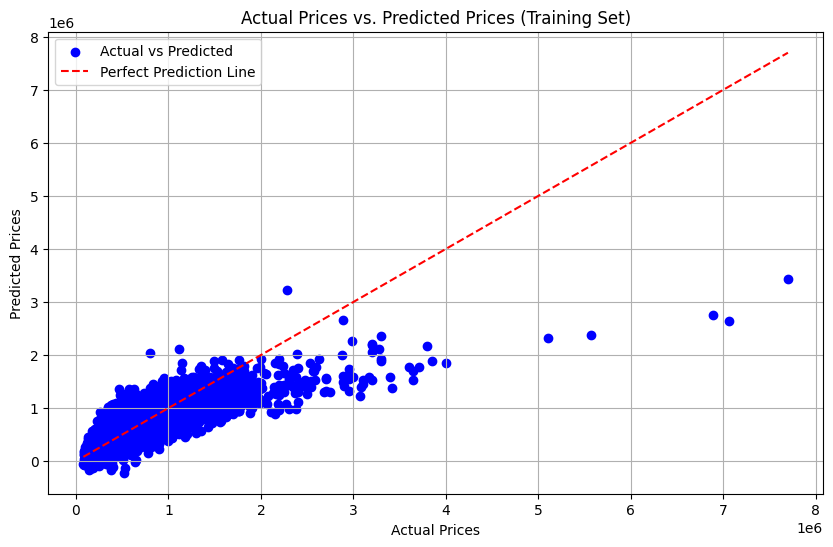

In [ ]:
# prompt: give me a graph of actual prices vs predicted prices in training set

import matplotlib.pyplot as plt

# Assuming you have Y_train and the predictions for the training set (e.g., y_train_pred)
# Calculate predictions for the training set
y_train_pred = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(Y_train, y_train_pred, color='blue', label='Actual vs Predicted')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Training Set)')
plt.legend()
plt.grid(True)
plt.show()